<h1 align="center"><font size="5">Capstone Project - Car accident severity (Week 1 & 2)</font></h1>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">Introduction : Business Problem</a></li>
        <li><a href="#ref2">Data</a></li>
        <li><a href="#ref3">Methodology</a></li>
        <li><a href="#ref4">Results</a></li>
    </ol>
</div>
<br>
<hr>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<a id="ref1"></a>
<h1 id="Introduction : Business Problem">1. Introduction : Business Problem</h1>

<h3>1.1.	Background a discussion of the background</h3>

Every year the lives of approximately 1.35 million people are cut short as a result of a road traffic crash. Between 20 and 50 million more people suffer non-fatal injuries, with many incurring a disability as a result of their injury.
Road traffic injuries cause considerable economic losses to individuals, their families, and to nations as a whole. [1]
France too suffers of road accidents with 3244 fatalities on French mainland roads in 2019, ten more than 2018. The numbers of accident for 2019 were 56016 and this is a very important number.

<h3>1.2.	Problem A description of the problem</h3>

We have to predict the severity of accidents using a dataset that should contain sever information about the weather and road condition, human fatalities, traffic delay, property damage and so an.
The aim of this project is to determine the possibility we get into a car accident and how severe it would be using these data 

<h3>1.3.	 Stakeholders</h3>

French road safety observatory and French government would be very interested to predict the severity of an accident, in order to improve road safety to be able to reduce the number of accidents and fatalities.


<a id="ref2"></a>
<h1 id="Data">2. Data</h1>

<h3>2.1.	Data Sources</h3>

The data can be founded on kaggle : https://www.kaggle.com/ahmedlahlou/accidents-in-france-from-2005-to-2016

<h3>2.2.	Feature selection</h3>

<h3>Caracteristics</h3>

<h5>Import data<\h5>

In [2]:
df_caract = pd.read_csv("C:\\Users\\ghenima\\Desktop\\projects\\Coursera_Capstone\\Car_Accident_France\\caracteristics.csv", encoding='latin-1', low_memory=False)

In [3]:
df_caract.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590


In [4]:
df_caract.dtypes

Num_Acc      int64
an           int64
mois         int64
jour         int64
hrmn         int64
lum          int64
agg          int64
int          int64
atm        float64
col        float64
com        float64
adr         object
gps         object
lat        float64
long        object
dep          int64
dtype: object

In [5]:
df_caract.describe()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,lat,dep
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839930.000000,839974.000000,839983.000000,3.624710e+05,839985.000000
mean,2.010011e+11,10.011129,6.679437,15.594687,1381.093505,1.912588,1.685924,1.694066,1.547116,4.187484,186.510172,2.849715e+06,564.257671
std,3.458009e+08,3.458059,3.389489,8.750201,540.757462,1.517900,0.464147,1.510792,1.587668,1.974998,171.873105,2.284591e+06,291.153083
min,2.005000e+11,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,10.000000
25%,2.007000e+11,7.000000,4.000000,8.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,3.000000,55.000000,0.000000e+00,310.000000
50%,2.010000e+11,10.000000,7.000000,15.000000,1446.000000,1.000000,2.000000,1.000000,1.000000,3.000000,118.000000,4.370200e+06,630.000000
75%,2.013000e+11,13.000000,10.000000,23.000000,1810.000000,3.000000,2.000000,2.000000,1.000000,6.000000,278.000000,4.799218e+06,780.000000
max,2.016001e+11,16.000000,12.000000,31.000000,2359.000000,5.000000,2.000000,9.000000,9.000000,7.000000,987.000000,5.564823e+06,976.000000


In [6]:
df_caract['Num_Acc'].count()

839985

In [7]:
df_caract = df_caract.drop(["an","adr","gps","lat","long"], axis=1)

In [8]:
df_caract.head()

,Num_Acc,mois,jour,hrmn,lum,agg,int,atm,col,com,dep
0,201600000001,2,1,1445,1,2,1,8.0,3.0,5.0,590
1,201600000002,3,16,1800,1,2,6,1.0,6.0,5.0,590
2,201600000003,7,13,1900,1,1,1,1.0,6.0,11.0,590
3,201600000004,8,15,1930,2,2,1,7.0,3.0,477.0,590
4,201600000005,12,23,1100,1,2,3,1.0,3.0,11.0,590


<h3>Places</h3>

<h5>Import data<\h5>

In [9]:
df_places = pd.read_csv("C:\\Users\\ghenima\\Desktop\\projects\\Coursera_Capstone\\Car_Accident_France\\places.csv")

C:\Users\ghenima\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
df_places.head()

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201600000001,3.0,39,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,39,NaN,NaN,1.0,0.0,NaN,NaN,0.0,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0.0
2,201600000003,3.0,1,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,99.0
3,201600000004,4.0,0,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
4,201600000005,4.0,0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0


In [11]:
df_places.dtypes

Num_Acc      int64
catr       float64
voie        object
v1         float64
v2          object
circ       float64
nbv        float64
pr         float64
pr1        float64
vosp       float64
prof       float64
plan       float64
lartpc     float64
larrout    float64
surf       float64
infra      float64
situ       float64
env1       float64
dtype: object

In [12]:
df_places.describe()

,Num_Acc,catr,v1,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
count,8.399850e+05,839984.000000,332816.000000,839187.000000,838195.000000,414770.000000,413463.000000,838345.000000,838924.000000,838909.000000,830440.000000,831706.000000,838968.000000,838707.000000,838983.000000,838709.000000
mean,2.010011e+11,3.418247,0.068575,1.855246,2.039593,109.701206,276.792763,0.130675,1.135474,1.198732,5.256996,58.389998,1.257012,0.438958,1.147201,37.916588
std,3.458009e+08,1.207917,0.567640,0.720949,1.550779,499.309309,357.941312,0.555434,0.620295,0.722200,21.801291,62.527755,0.954748,1.350905,0.722495,47.979898
min,2.005000e+11,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-81.000000,0.000000,0.000000,0.000000,0.000000
25%,2.007000e+11,3.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2.010000e+11,4.000000,0.000000,2.000000,2.000000,6.000000,100.000000,0.000000,1.000000,1.000000,0.000000,60.000000,1.000000,0.000000,1.000000,0.000000
75%,2.013000e+11,4.000000,0.000000,2.000000,2.000000,28.000000,500.000000,0.000000,1.000000,1.000000,0.000000,80.000000,1.000000,0.000000,1.000000,99.000000
max,2.016001e+11,9.000000,9.000000,4.000000,99.000000,9900.000000,9540.000000,3.000000,4.000000,4.000000,960.000000,999.000000,9.000000,7.000000,5.000000,99.000000


In [13]:
df_places['Num_Acc'].count()

839985

In [14]:
df_places= df_places.drop(["voie","v1","v2","vosp","pr","pr1","plan","lartpc","larrout","situ","env1"], axis=1)

In [15]:
df_places.head()

,Num_Acc,catr,circ,nbv,prof,surf,infra
0,201600000001,3.0,2.0,0.0,1.0,1.0,0.0
1,201600000002,3.0,1.0,0.0,1.0,1.0,0.0
2,201600000003,3.0,2.0,2.0,1.0,2.0,0.0
3,201600000004,4.0,2.0,0.0,1.0,1.0,0.0
4,201600000005,4.0,0.0,0.0,0.0,1.0,0.0


<h3>Users</h3>

<h5>Import data<\h5>

In [16]:
df_users = pd.read_csv("C:\\Users\\ghenima\\Desktop\\projects\\Coursera_Capstone\\Car_Accident_France\\users.csv")

In [17]:
df_users.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01


In [18]:
df_users.dtypes

Num_Acc      int64
place      float64
catu         int64
grav         int64
sexe         int64
trajet     float64
secu       float64
locp       float64
actp       float64
etatp      float64
an_nais    float64
num_veh     object
dtype: object

In [19]:
df_users.describe()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais
count,1.876005e+06,1.775639e+06,1.876005e+06,1.876005e+06,1.876005e+06,1.875636e+06,1.832547e+06,1.874341e+06,1.874232e+06,1.874299e+06,1.873654e+06
mean,2.009992e+11,1.283953e+00,1.341410e+00,2.513080e+00,1.328885e+00,3.075555e+00,1.822304e+01,2.242522e-01,2.762860e-01,1.023823e-01,1.972682e+03
std,3.464316e+08,9.058402e-01,6.334311e-01,1.332745e+00,4.698081e-01,2.676239e+00,1.977354e+01,8.722973e-01,1.051576e+00,3.800489e-01,1.834448e+01
min,2.005000e+11,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.896000e+03
25%,2.007000e+11,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.961000e+03
50%,2.010000e+11,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,4.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03
75%,2.013000e+11,1.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,5.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.987000e+03
max,2.016001e+11,9.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,9.000000e+00,9.300000e+01,8.000000e+00,9.000000e+00,3.000000e+00,2.016000e+03


In [20]:
df_users['Num_Acc'].count()

1876005

In [21]:
df_users = df_users.drop(["num_veh","place","catu","sexe","an_nais","trajet","secu","locp","actp","etatp"], axis=1)

In [22]:
df_users.head()

,Num_Acc,grav
0,201600000001,1
1,201600000001,3
2,201600000002,3
3,201600000002,3
4,201600000002,3


In [23]:
df_users['Num_Acc'].count()

1876005

In [24]:
df_users = df_users.replace([1,4],0)
df_users = df_users.replace([2,3],1)

In [25]:
df_users = df_users.groupby(['Num_Acc'], as_index=False).max()

In [26]:
df_users.count()

Num_Acc    839985
grav       839985
dtype: int64

<h3>Merging</h3>

In [27]:
from functools import reduce
dataframes = [df_caract, df_places, df_users]
accidents = reduce(lambda left, right: pd.merge(left, right, on=['Num_Acc']), dataframes)

In [28]:
accidents.head()

,Num_Acc,mois,jour,hrmn,lum,agg,int,atm,col,com,dep,catr,circ,nbv,prof,surf,infra,grav
0,201600000001,2,1,1445,1,2,1,8.0,3.0,5.0,590,3.0,2.0,0.0,1.0,1.0,0.0,1
1,201600000002,3,16,1800,1,2,6,1.0,6.0,5.0,590,3.0,1.0,0.0,1.0,1.0,0.0,1
2,201600000003,7,13,1900,1,1,1,1.0,6.0,11.0,590,3.0,2.0,2.0,1.0,2.0,0.0,1
3,201600000004,8,15,1930,2,2,1,7.0,3.0,477.0,590,4.0,2.0,0.0,1.0,1.0,0.0,1
4,201600000005,12,23,1100,1,2,3,1.0,3.0,11.0,590,4.0,0.0,0.0,0.0,1.0,0.0,1


In [29]:
accidents.columns.values

array(['Num_Acc', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'dep', 'catr', 'circ', 'nbv', 'prof', 'surf',
       'infra', 'grav'], dtype=object)

In [30]:
accidents['Num_Acc'].count()

839985

In [31]:
missing_data_merge = accidents.isnull()
for column in missing_data_merge.columns.values.tolist():
    print(column)
    print (missing_data_merge[column].value_counts())
    print("")  

Num_Acc
False    839985
Name: Num_Acc, dtype: int64

mois
False    839985
Name: mois, dtype: int64

jour
False    839985
Name: jour, dtype: int64

hrmn
False    839985
Name: hrmn, dtype: int64

lum
False    839985
Name: lum, dtype: int64

agg
False    839985
Name: agg, dtype: int64

int
False    839985
Name: int, dtype: int64

atm
False    839930
True         55
Name: atm, dtype: int64

col
False    839974
True         11
Name: col, dtype: int64

com
False    839983
True          2
Name: com, dtype: int64

dep
False    839985
Name: dep, dtype: int64

catr
False    839984
True          1
Name: catr, dtype: int64

circ
False    839187
True        798
Name: circ, dtype: int64

nbv
False    838195
True       1790
Name: nbv, dtype: int64

prof
False    838924
True       1061
Name: prof, dtype: int64

surf
False    838968
True       1017
Name: surf, dtype: int64

infra
False    838707
True       1278
Name: infra, dtype: int64

grav
False    839985
Name: grav, dtype: int64



In [32]:
accidents = accidents.drop(["Num_Acc"], axis=1)

In [33]:
accidents.head()

,mois,jour,hrmn,lum,agg,int,atm,col,com,dep,catr,circ,nbv,prof,surf,infra,grav
0,2,1,1445,1,2,1,8.0,3.0,5.0,590,3.0,2.0,0.0,1.0,1.0,0.0,1
1,3,16,1800,1,2,6,1.0,6.0,5.0,590,3.0,1.0,0.0,1.0,1.0,0.0,1
2,7,13,1900,1,1,1,1.0,6.0,11.0,590,3.0,2.0,2.0,1.0,2.0,0.0,1
3,8,15,1930,2,2,1,7.0,3.0,477.0,590,4.0,2.0,0.0,1.0,1.0,0.0,1
4,12,23,1100,1,2,3,1.0,3.0,11.0,590,4.0,0.0,0.0,0.0,1.0,0.0,1


<h3 id="Data Cleaning"> Data Cleaning</h3>
<h4 id="deal_missing_values">Deal with missing data</h4>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

<b>Replace by frequency:</b>
<ul>
    <li>"nbv": 1790 missing data</li>
    <li>"atm": 55 missing data</li>
    <li>"col": 11 missing data</li>
    <li>"catr": 1 missing data</li>
    <li>"circ": 798 missing data</li>
    <li>"prof": 1061 missing data</li>
    <li>"surf": 1017 missing data</li>
    <li>"infra": 1278 missing data</li>

</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"com": 2 missing data, simply delete the whole row
    </li>
</ul>

<h4>Calculate the fequency</h4>

nbv:

In [34]:
print("nbv frequency", accidents['nbv'].value_counts().idxmax())
print("atm frequency", accidents['atm'].value_counts().idxmax())
print("col frequency", accidents['col'].value_counts().idxmax())
print("catr frequency", accidents['catr'].value_counts().idxmax())
print("circ frequency", accidents['circ'].value_counts().idxmax())
print("prof frequency", accidents['prof'].value_counts().idxmax())
print("surf frequency", accidents['surf'].value_counts().idxmax())
print("infra frequency", accidents['infra'].value_counts().idxmax())

nbv frequency 2.0
atm frequency 1.0
col frequency 6.0
catr frequency 4.0
circ frequency 2.0
prof frequency 1.0
surf frequency 1.0
infra frequency 0.0


In [35]:
accidents["nbv"].replace(np.nan, 2, inplace=True)
accidents["atm"].replace(np.nan, 1, inplace=True)
accidents["col"].replace(np.nan, 6, inplace=True)
accidents["catr"].replace(np.nan, 4, inplace=True)
accidents["circ"].replace(np.nan, 2, inplace=True)
accidents["prof"].replace(np.nan, 1, inplace=True)
accidents["surf"].replace(np.nan, 1, inplace=True)
accidents["infra"].replace(np.nan, 0, inplace=True)

<h4>Drop the whole row</h4>

In [36]:
accidents.dropna(subset=["com"], axis=0, inplace=True)

accidents.reset_index(drop=True, inplace=True)

In [37]:
missing_data_merge = accidents.isnull()
for column in missing_data_merge.columns.values.tolist():
    print(column)
    print (missing_data_merge[column].value_counts())
    print("")  

mois
False    839983
Name: mois, dtype: int64

jour
False    839983
Name: jour, dtype: int64

hrmn
False    839983
Name: hrmn, dtype: int64

lum
False    839983
Name: lum, dtype: int64

agg
False    839983
Name: agg, dtype: int64

int
False    839983
Name: int, dtype: int64

atm
False    839983
Name: atm, dtype: int64

col
False    839983
Name: col, dtype: int64

com
False    839983
Name: com, dtype: int64

dep
False    839983
Name: dep, dtype: int64

catr
False    839983
Name: catr, dtype: int64

circ
False    839983
Name: circ, dtype: int64

nbv
False    839983
Name: nbv, dtype: int64

prof
False    839983
Name: prof, dtype: int64

surf
False    839983
Name: surf, dtype: int64

infra
False    839983
Name: infra, dtype: int64

grav
False    839983
Name: grav, dtype: int64



In [38]:
accidents.shape

(839983, 17)

<a id="ref3"></a>
<h1 id="Methodology">3. Methodology</h1>

<h3>3.1.	Exploratory data analysis</h3>

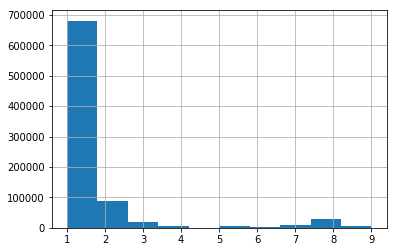

In [39]:
accidents["atm"].hist()

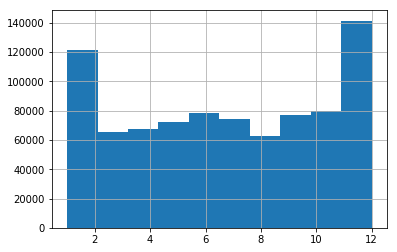

In [40]:
accidents["mois"].hist()

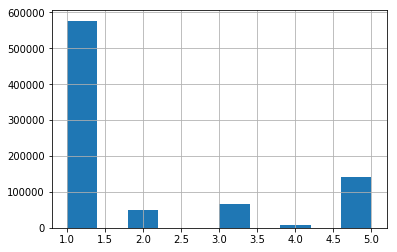

In [41]:
accidents["lum"].hist()

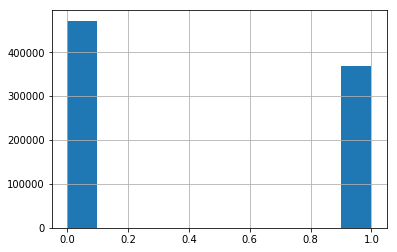

In [42]:
accidents["grav"].hist()

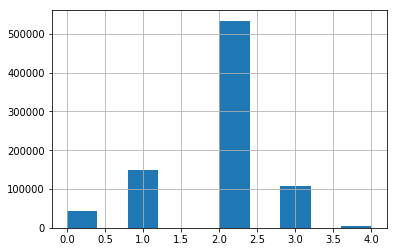

In [43]:
accidents["circ"].hist()

## Train/Test

In [44]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(accidents.drop('grav', axis=1), accidents['grav'], test_size=0.2, random_state=8)
X_train, X_val, Y_train, Y_val = train_test_split(Xtrain, Ytrain, test_size=0.2) 

## Model dev

### KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,Y_train)
    yhat = kNN_model.predict(X_val)
    
    
    mean_acc[n-1]=np.mean(yhat==Y_val);
    
    std_acc[n-1]=np.std(yhat==Y_val)/np.sqrt(yhat.shape[0])
mean_acc

array([0.63454069, 0.64146788, 0.66139377, 0.6604637 , 0.67108141,
       0.66936264, 0.67588803, 0.67285972, 0.67948928, 0.67573922,
       0.67983155, 0.67722734, 0.68159496, 0.67797884])

In [46]:
from sklearn.neighbors import KNeighborsClassifier
k = 13
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,Y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [66]:
knn_yhat = kNN_model.predict(Xtest)

### Logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
LR_model

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
LR_yhat = LR_model.predict(Xtest)

### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100,random_state=0, n_jobs=-1)
RF_model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [51]:
RF_yhat = RF_model.predict(Xtest)

## Model validation

In [58]:
from sklearn.metrics import accuracy_score

### KNN

In [59]:
y_pred_kNN = kNN_model.predict(X_val)
score_KNN = accuracy_score(Y_val,y_pred_kNN)
print('Accuracy :',score_KNN)

Accuracy : 0.6796380898525276


### Logistic regression

In [60]:
y_pred_LR = LR_model.predict(X_val)
score_LR = accuracy_score(Y_val,y_pred_LR)
print('Accuracy :',score_LR)

Accuracy : 0.6626289081682764


### Random Forest

In [57]:
y_pred_RF = RF_model.predict(X_val)
score_rf = accuracy_score(Y_val,y_pred_RF)
print('Accuracy :',score_rf)

Accuracy : 0.7324364945906933


<a id="ref4"></a>
<h1 id="Results">4. Results</h1>

The Random Forest present a better accuracy to predict the seveirty of accident 

| Algorithm          | Accuracy   |
|--------------------|------------|
| KNN                | 0.6796     | 
| Random Forest      | 0.7324     | 
| LogisticRegression | 0.6626     | 